In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options for better notebook readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Read the datasets
listings_df = pd.read_csv('/Users/bastianmeyer/Library/Mobile Documents/com~apple~CloudDocs/CBS/MSc Businesss Administration & Data Science/First year/1st Semester/Data Management & Visualization/Exam/airbnb_analysis/data/raw/calendar2024.csv')
calendar_df = pd.read_csv('/Users/bastianmeyer/Library/Mobile Documents/com~apple~CloudDocs/CBS/MSc Businesss Administration & Data Science/First year/1st Semester/Data Management & Visualization/Exam/airbnb_analysis/data/raw/listings2024.csv')
reviews_df = pd.read_csv('/Users/bastianmeyer/Library/Mobile Documents/com~apple~CloudDocs/CBS/MSc Businesss Administration & Data Science/First year/1st Semester/Data Management & Visualization/Exam/airbnb_analysis/data/raw/reviews2024.csv')

In [3]:
listings_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,586421,2024-06-30,f,$250.00,NaN,4.0,31.0
1,586421,2024-07-01,f,$250.00,NaN,4.0,31.0
2,586421,2024-07-02,t,$250.00,NaN,4.0,31.0
3,586421,2024-07-03,f,$250.00,NaN,4.0,31.0
4,586421,2024-07-04,f,$250.00,NaN,4.0,31.0


In [4]:
calendar_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,31094,https://www.airbnb.com/rooms/31094,20240629155650,2024-06-30,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,https://www.airbnb.com/users/show/129976,Ebbe,2010-05-22,"Copenhagen, Denmark","Hi and welcome. My name is Ebbe, I am a medica...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/129976/profil...,https://a0.muscache.com/im/users/129976/profil...,Vesterbro,1.0,1.0,"['email', 'phone']",t,t,"Copenhagen, Capital Region of Denmark, Denmark",Vesterbro-Kongens Enghave,NaN,55.666602,12.555283,Entire condo,Entire home/apt,6,NaN,1.5 baths,4.0,NaN,"[""Toaster"", ""Refrigerator"", ""Conditioner"", ""Ho...",NaN,3,10,3,3,10,10,3.0,10.0,NaN,t,0,0,0,0,2024-06-30,19,0,0,2010-08-16,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,NaN,f,1,1,0,0,0.11
1,262961,https://www.airbnb.com/rooms/262961,20240629155650,2024-06-30,city scrape,192m2 FLAT+ 8m2 BALCONY IN CENTER NØRREBRO HOOD,If you are looking for a large apartment in ce...,TIME OUT - The world’s coolest neighbourhoods ...,https://a0.muscache.com/pictures/261aa506-7b13...,1379904,https://www.airbnb.com/users/show/1379904,Nina,2011-11-07,"Copenhagen, Denmark",Hej - I read the Master in Pedagogy. My husba...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/43342...,https://a0.muscache.com/im/pictures/user/43342...,Nørrebro,1.0,3.0,"['email', 'phone']",t,t,"Copenhagen, Capital Region of Denmark, Denmark",Nrrebro,NaN,55.688670,12.560950,Entire rental unit,Entire home/apt,8,1.5,1.5 baths,4.0,4.0,"[""Refrigerator"", ""Fire extinguisher"", ""Hot wat...","$1,865.00",5,90,5,5,90,90,5.0,90.0,NaN,t,0,0,0,0,2024-06-30,36,2,0,2011-12-13,2023-07-26,4.62,4.67,4.44,4.94,4.94,4.89,4.53,NaN,f,1,1,0,0,0.24
2,263036,https://www.airbnb.com/rooms/263036,20240629155650,2024-06-30,city scrape,Bright flat in central location,NaN,NaN,https://a0.muscache.com/pictures/17770169/f1fb...,1232471,https://www.airbnb.com/users/show/1232471,Anita,2011-10-01,"Copenhagen, Denmark","Bla, bla, bla, bla",within a few hours,100%,0%,f,https://a0.muscache.com/im/users/1232471/profi...,https://a0.muscache.com/im/users/1232471/profi...,Nørrebro,1.0,1.0,"['email', 'phone']",t,t,NaN,Nrrebro,NaN,55.690080,12.543780,Entire rental unit,Entire home/apt,2,0.0,0 baths,2.0,2.0,"[""Carbon monoxide alarm"", ""Backyard"", ""Kitchen...",$905.00,4,10,4,4,10,10,4.0,10.0,NaN,t,0,4,32,32,2024-06-30,21,1,0,2012-01-02,2023-08-03,4.86,4.81,4.90,4.86,4.86,4.81,4.67,NaN,f,1,1,0,0,0.14
3,32379,https://www.airbnb.com/rooms/32379,20240629155650,2024-06-30,city scrape

In [5]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,31094,79346,2010-08-16,171607,Ben,"We had a great stay. Conveniently located, qui..."
1,31094,166275,2011-01-05,306860,Makita,It was a very good stay. The appartment was re...
2,31094,1452299,2012-06-10,1321058,Pierre,Really enjoyed my time at Ebbe's place. It is...
3,31094,6766430,2013-08-24,2182771,Sussie,"The apartment was very well located, 10-15 min..."
4,31094,6827217,2013-08-26,8025926,Wil,"This is a great flat, very clean with everythi..."


In [6]:
# Initial exploration functions
def explore_dataset(df, name):
    print(f"\n{'='*50}")
    print(f"Dataset: {name}")
    print(f"{'='*50}")
    
    print("\n1. Basic Information:")
    print(f"Shape: {df.shape}")
    print("\n2. Data Types:")
    print(df.dtypes)
    
    print("\n3. Missing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    })
    print(missing_info[missing_info['Missing Values'] > 0])
    
    print("\n4. Sample Data:")
    print(df.head())
    
    return missing_info

In [7]:
# Explore each dataset
listings_missing = explore_dataset(listings_df, 'Listings')
calendar_missing = explore_dataset(calendar_df, 'Calendar')
reviews_missing = explore_dataset(reviews_df, 'Reviews')


Dataset: Listings

1. Basic Information:
Shape: (7631731, 7)

2. Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtype: object

3. Missing Values:
                Missing Values  Percentage
adjusted_price         7631731  100.000000
minimum_nights               1    0.000013
maximum_nights               1    0.000013

4. Sample Data:
   listing_id        date available    price  adjusted_price  minimum_nights  \
0      586421  2024-06-30         f  $250.00             NaN             4.0   
1      586421  2024-07-01         f  $250.00             NaN             4.0   
2      586421  2024-07-02         t  $250.00             NaN             4.0   
3      586421  2024-07-03         f  $250.00             NaN             4.0   
4      586421  2024-07-04         f  $250.00             NaN             4.0   

   maximum_nights  
0            31.

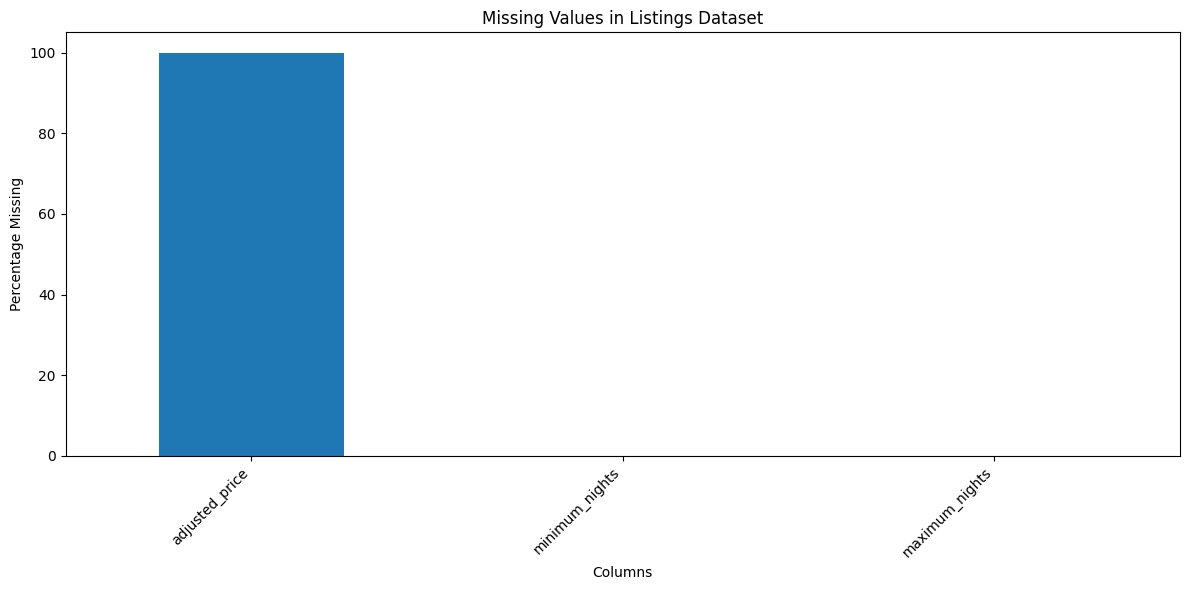

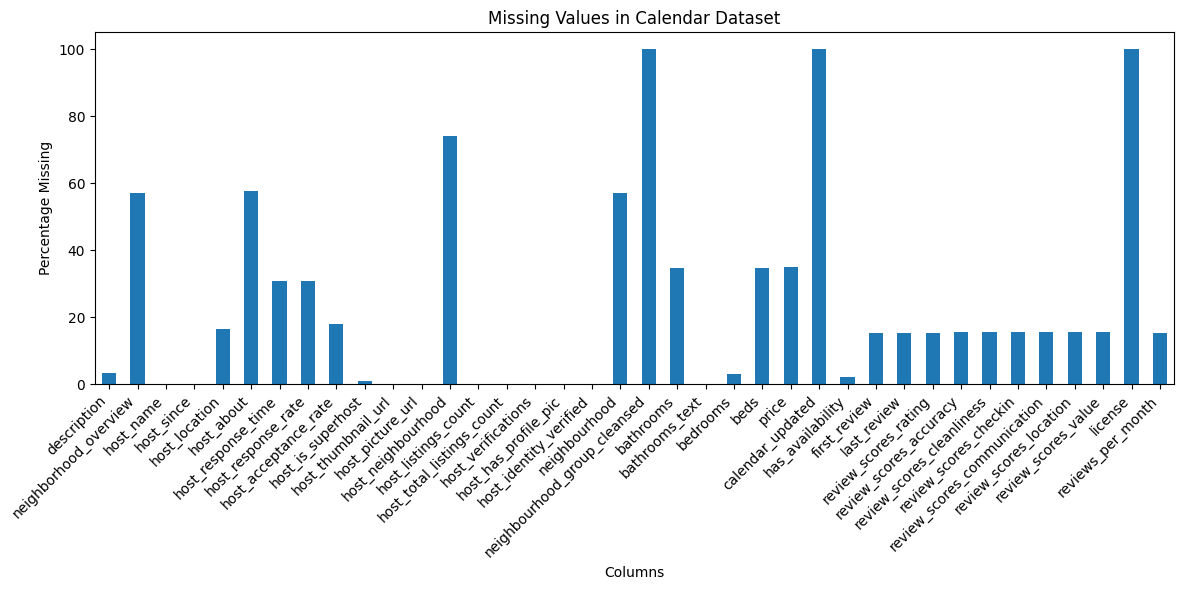

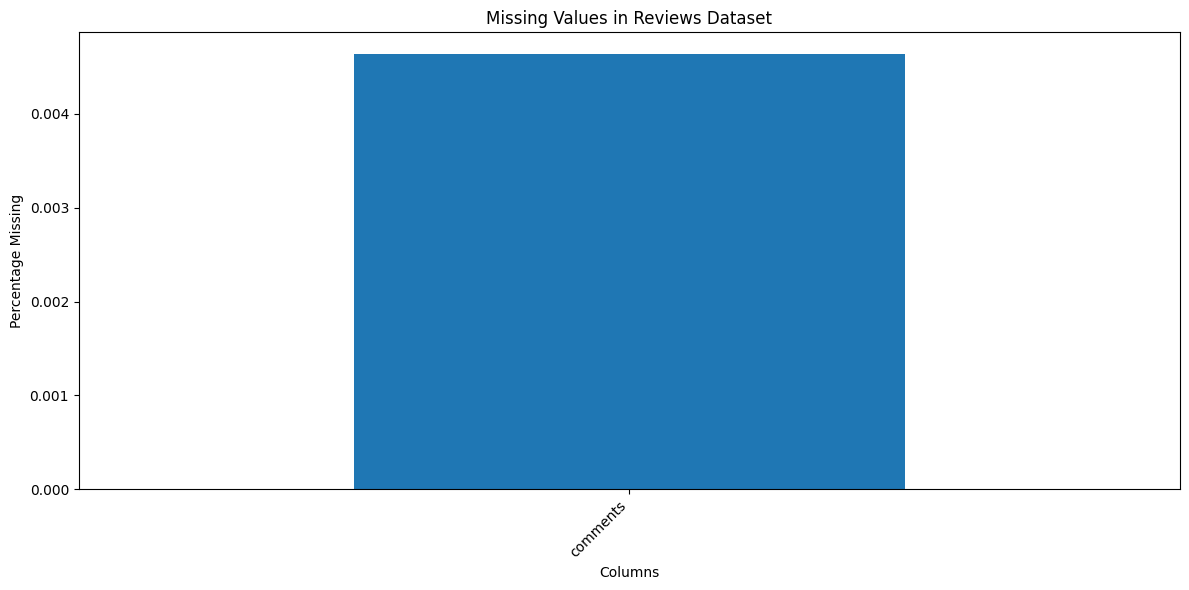

In [8]:
# Basic visualizations for initial insights
def plot_missing_values(missing_info, title):
    plt.figure(figsize=(12, 6))
    missing_info[missing_info['Missing Values'] > 0]['Percentage'].plot(kind='bar')
    plt.title(f'Missing Values in {title} Dataset')
    plt.xlabel('Columns')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot missing values for each dataset
plot_missing_values(listings_missing, 'Listings')
plot_missing_values(calendar_missing, 'Calendar')
plot_missing_values(reviews_missing, 'Reviews')